# IMAGE CLASSIFICATION WITH NEURAL NETWORKS


# Loading Libraries

In [1]:
import os
import random
import shutil
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, InceptionV3, Xception
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


import warnings
warnings.filterwarnings("ignore")

CatsDogs/
    ├── dogs/
    │   ├── dog_image1.jpg
    │   ├── dog_image2.jpg
    │   └── ...
    └── cats/
        ├── cat_image1.jpg
        ├── cat_image2.jpg
        └── ...


In [2]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Unzipping the data and loading it to LocalDrive

import zipfile

zip_file = "C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\CatsDogs.zip"
converted_dir = "C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\Converted"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(converted_dir)

In [4]:
converted_dir

'C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\Converted'

## Data Preprocessing

In [5]:
# Converting the data into the required format and leaving out the unidentified images and raising an exception message for the same
dataset_dir = "C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\Converted\\CatsDogs"

In [6]:
# Create a new directory for storing the converted images
converted_dir = os.path.join(dataset_dir, 'Converted')
os.makedirs(converted_dir, exist_ok=True)

# Convert images to JPG format
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    converted_class_dir = os.path.join(converted_dir, class_name)
    os.makedirs(converted_class_dir, exist_ok=True)
    
    for filename in os.listdir(class_dir):
        img_path = os.path.join(class_dir, filename)
        converted_img_path = os.path.join(converted_class_dir, filename)
        
        try:
            img = Image.open(img_path)
            img = img.convert('RGB')  # Convert to RGB format
            img.save(converted_img_path, 'JPEG')
        except Exception as e:
            print(f"Error converting image {img_path}: {str(e)}")

Error converting image C:\Users\SaiSpandana\OneDrive\Desktop\ProBuddy\Converted\CatsDogs\Cats\666.jpg: cannot identify image file 'C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\Converted\\CatsDogs\\Cats\\666.jpg'
Error converting image C:\Users\SaiSpandana\OneDrive\Desktop\ProBuddy\Converted\CatsDogs\Converted\Cats: [Errno 13] Permission denied: 'C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\Converted\\CatsDogs\\Converted\\Cats'
Error converting image C:\Users\SaiSpandana\OneDrive\Desktop\ProBuddy\Converted\CatsDogs\Converted\Converted: [Errno 13] Permission denied: 'C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\Converted\\CatsDogs\\Converted\\Converted'
Error converting image C:\Users\SaiSpandana\OneDrive\Desktop\ProBuddy\Converted\CatsDogs\Converted\Dogs: [Errno 13] Permission denied: 'C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\Converted\\CatsDogs\\Converted\\Dogs'
Error converting image C:\Users\SaiSpandana\OneDrive\Desktop\ProBuddy\Converted\CatsDogs\

Here we have converted all the images into RGB format which were previosuly not present and from analysis, we even find that there are some corrupted images which needs to be removed before further usage so we have created a new folder named converted to store all the images that are converted.


In [7]:
# Path of the folder to be removed
folder_path = "C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\Converted\\CatsDogs\\Converted\\Converted"
# Removing the folder
shutil.rmtree(folder_path)

In [52]:
# Define the image size and batch size
image_size = (150, 150)
batch_size = 32


# Set the path to the dataset folder
data_dir = 'C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\Converted\\CatsDogs\\Converted'
# Perform train-test split 
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [53]:
# Loading the data from the folders using datagen
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    color_mode='grayscale',  # Convert images to grayscale
    seed=42
)

# Loading the data from the folders using datagen
test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    color_mode='grayscale',  # Convert images to grayscale
    seed=42
)


Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


## EDA

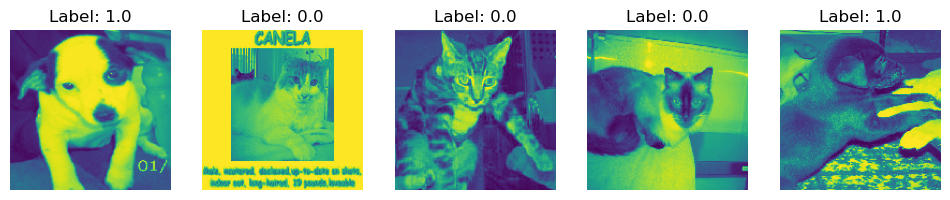

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot images from train_generator
def plot_images(generator, num_images=5):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Plot the images
    fig, axes = plt.subplots(1, num_images, figsize=(12, 12))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title('Label: {}'.format(labels[i]))

    plt.show()

# Plot images from train_generator
plot_images(train_generator)

The images seem to be in highlighted color due to the plotting structure of matplotlib and the converted image structure of RGB.


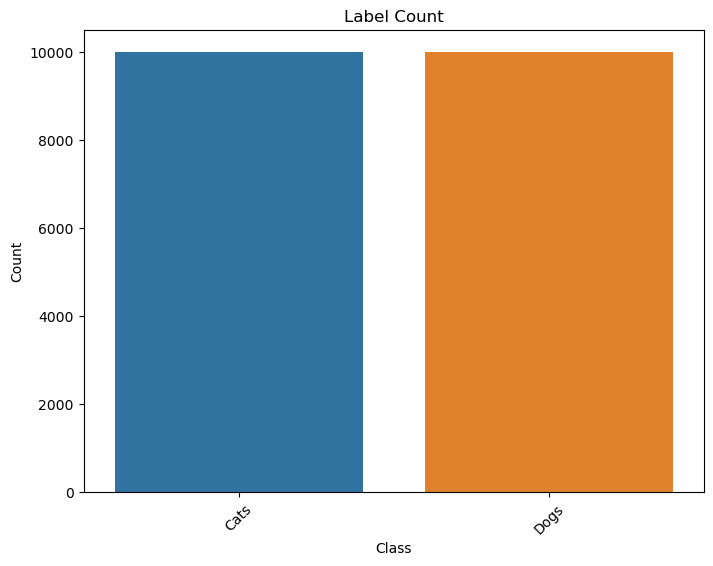

In [55]:
# Create a countplot of labels
def countplot_labels(generator):
    # Get all the labels from the generator
    labels = generator.classes

    # Convert the numeric labels to class names
    class_names = list(generator.class_indices.keys())
    label_names = [class_names[label] for label in labels]

    # Plot the countplot
    plt.figure(figsize=(8, 6))
    sns.countplot(x=label_names)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Label Count')
    plt.xticks(rotation=45)

    plt.show()

# Create a countplot of labels
countplot_labels(train_generator)

The dataset is well-balanced so there is no issue of imbalance here.

## Building Models

### Model-1(custom-CNN1)

In [56]:
# Define the CNN model architecture
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [57]:
# Train the model
history1 = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
625/625 [==============================] - 660s 1s/step - loss: 0.6558 - accuracy: 0.5958 - val_loss: 0.5453 - val_accuracy: 0.7280
Epoch 2/10
625/625 [==============================] - 666s 1s/step - loss: 0.5108 - accuracy: 0.7491 - val_loss: 0.4389 - val_accuracy: 0.7963
Epoch 3/10
625/625 [==============================] - 660s 1s/step - loss: 0.3980 - accuracy: 0.8196 - val_loss: 0.3706 - val_accuracy: 0.8355
Epoch 4/10
625/625 [==============================] - 645s 1s/step - loss: 0.3089 - accuracy: 0.8655 - val_loss: 0.3583 - val_accuracy: 0.8438
Epoch 5/10
625/625 [==============================] - 677s 1s/step - loss: 0.2511 - accuracy: 0.8932 - val_loss: 0.3118 - val_accuracy: 0.8708
Epoch 6/10
625/625 [==============================] - 644s 1s/step - loss: 0.1978 - accuracy: 0.9194 - val_loss: 0.3004 - val_accuracy: 0.8770
Epoch 7/10
625/625 [==============================] - 855s 1s/step - loss: 0.1512 - accuracy: 0.9383 - val_loss: 0.3286 - val_accuracy: 0.8764

In [58]:
# Evaluate the model
test_loss, test_accuracy = model1.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

157/157 [==============================] - 42s 263ms/step - loss: 0.4370 - accuracy: 0.8778
Test loss: 0.43697455525398254
Test accuracy: 0.8777511119842529


In [59]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions on the test data
y_pred = model1.predict(test_generator)
y_pred = np.round(y_pred).flatten()

# Get the true labels from the test data
y_true = test_generator.classes

# Compute classification metrics
report = classification_report(y_true, y_pred, target_names=['cat', 'dog'])
print(report)

157/157 [==============================] - 45s 281ms/step
              precision    recall  f1-score   support

         cat       0.50      0.50      0.50      2499
         dog       0.50      0.50      0.50      2499

    accuracy                           0.50      4998
   macro avg       0.50      0.50      0.50      4998
weighted avg       0.50      0.50      0.50      4998



157/157 [==============================] - 42s 266ms/step


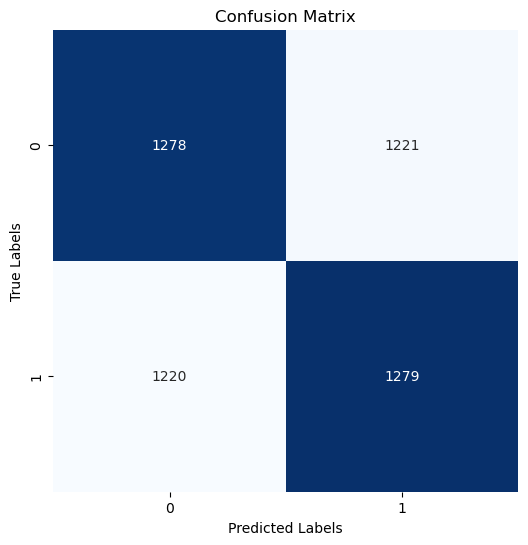

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions on the test data
y_pred = model1.predict(test_generator)
y_pred = np.round(y_pred).flatten()

# Get the true labels from the test data
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


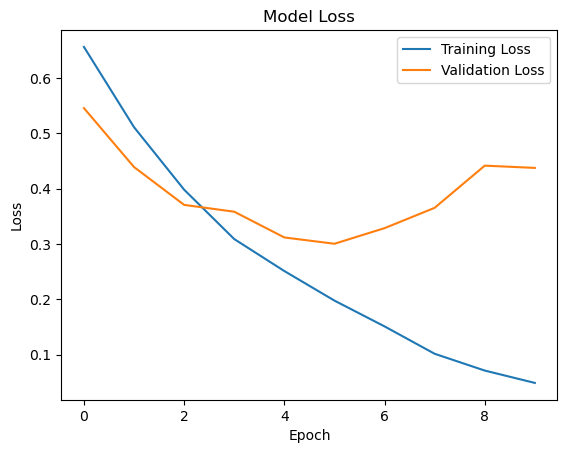

In [61]:
# Plot the training and validation loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

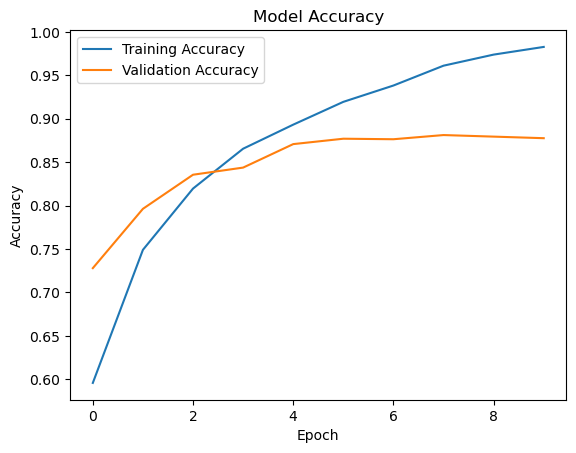

In [62]:
# Plot the training and validation accuracy
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


## Model-2(Resnet50)

In [30]:
# # Set the path to the dataset folder
data_dir = 'C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\Converted\\CatsDogs\\Converted'

# # Perform train-test split
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    # color_mode='grayscale',  # Convert images to grayscale
    seed=42
)

test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    # color_mode='grayscale',  # Convert images to grayscale
    seed=42
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [31]:
# Define the second model using ResNet50 pre-trained classifier
base_model2 = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x2 = base_model2.output
x2 = Flatten()(x2)
x2 = Dense(512, activation='relu')(x2)
predictions2 = Dense(1, activation='sigmoid')(x2)
model2 = Model(inputs=base_model2.input, outputs=predictions2)

# Freeze the pre-trained layers
for layer in base_model2.layers:
    layer.trainable = False

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [32]:
# Train the second model
history2 = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/5
625/625 [==============================] - 1468s 2s/step - loss: 0.7092 - accuracy: 0.6289 - val_loss: 0.6243 - val_accuracy: 0.6520
Epoch 2/5
625/625 [==============================] - 1495s 2s/step - loss: 0.6069 - accuracy: 0.6666 - val_loss: 0.5757 - val_accuracy: 0.6913
Epoch 3/5
625/625 [==============================] - 1498s 2s/step - loss: 0.5700 - accuracy: 0.7034 - val_loss: 0.5559 - val_accuracy: 0.7252
Epoch 4/5
625/625 [==============================] - 1525s 2s/step - loss: 0.5617 - accuracy: 0.7085 - val_loss: 0.5569 - val_accuracy: 0.7131
Epoch 5/5
625/625 [==============================] - 1570s 3s/step - loss: 0.5548 - accuracy: 0.7176 - val_loss: 0.5722 - val_accuracy: 0.6909


In [35]:
test_loss2, test_accuracy2 = model2.evaluate(test_generator)
print('Model 2 - Test loss:', test_loss2)
print('Model 2 - Test accuracy:', test_accuracy2)

157/157 [==============================] - 241s 2s/step - loss: 0.5719 - accuracy: 0.6913
Model 2 - Test loss: 0.5718798041343689
Model 2 - Test accuracy: 0.691276490688324


In [36]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions on the test data
y_pred = model2.predict(test_generator)
y_pred = np.round(y_pred).flatten()

# Get the true labels from the test data
y_true = test_generator.classes

# Compute classification metrics
report = classification_report(y_true, y_pred, target_names=['cat', 'dog'])
print(report)


157/157 [==============================] - 240s 2s/step
              precision    recall  f1-score   support

         cat       0.50      0.71      0.59      2499
         dog       0.50      0.29      0.36      2499

    accuracy                           0.50      4998
   macro avg       0.50      0.50      0.47      4998
weighted avg       0.50      0.50      0.47      4998



157/157 [==============================] - 254s 2s/step


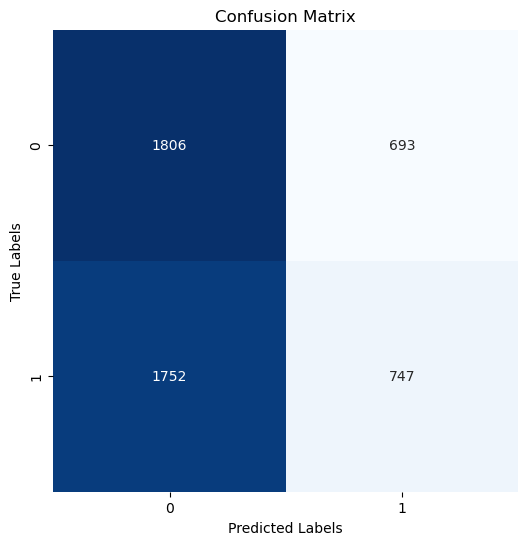

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions on the test data
y_pred = model2.predict(test_generator)
y_pred = np.round(y_pred).flatten()

# Get the true labels from the test data
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

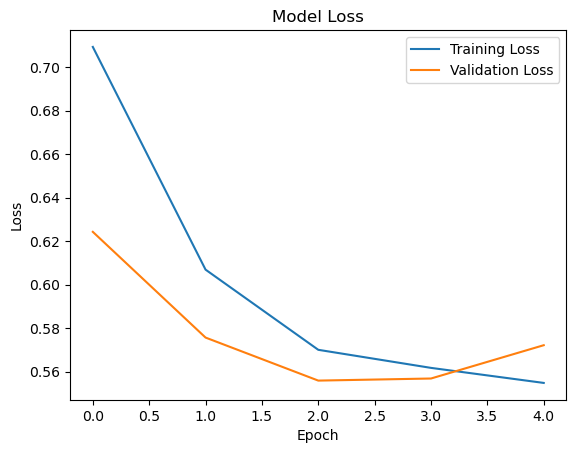

In [38]:
# Plot the training and validation loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


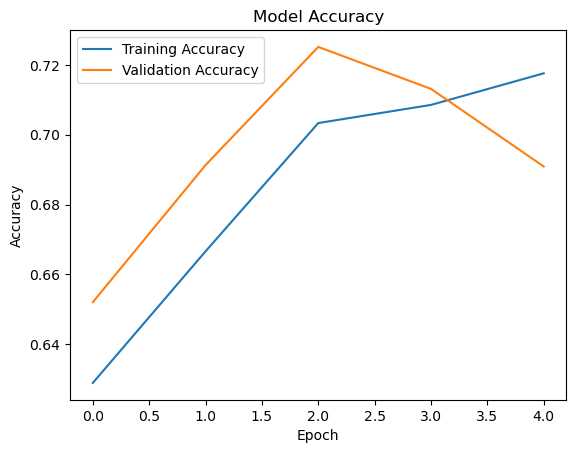

In [39]:
# Plot the training and validation accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


### Model-3 (MobileNetV2)

In [40]:
# Define the third model using MobileNetV2 pre-trained classifier
base_model3 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x3 = base_model3.output
x3 = Flatten()(x3)
x3 = Dense(512, activation='relu')(x3)
predictions3 = Dense(1, activation='sigmoid')(x3)
model3 = Model(inputs=base_model3.input, outputs=predictions3)

# Freeze the pre-trained layers
for layer in base_model3.layers:
    layer.trainable = False

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_5[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)           

In [41]:
# Train the third model
history3 = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


Epoch 1/5
625/625 [==============================] - 645s 1s/step - loss: 0.3790 - accuracy: 0.9507 - val_loss: 0.0820 - val_accuracy: 0.9653
Epoch 2/5
625/625 [==============================] - 606s 969ms/step - loss: 0.0628 - accuracy: 0.9761 - val_loss: 0.1021 - val_accuracy: 0.9647
Epoch 3/5
625/625 [==============================] - 645s 1s/step - loss: 0.0434 - accuracy: 0.9834 - val_loss: 0.1081 - val_accuracy: 0.9637
Epoch 4/5
625/625 [==============================] - 618s 989ms/step - loss: 0.0421 - accuracy: 0.9854 - val_loss: 0.1167 - val_accuracy: 0.9611
Epoch 5/5
625/625 [==============================] - 617s 986ms/step - loss: 0.0203 - accuracy: 0.9923 - val_loss: 0.1452 - val_accuracy: 0.9643


In [42]:
test_loss3, test_accuracy3 = model3.evaluate(test_generator)
print('Model 3 - Test loss:', test_loss3)
print('Model 3 - Test accuracy:', test_accuracy3)

157/157 [==============================] - 81s 514ms/step - loss: 0.1451 - accuracy: 0.9644
Model 3 - Test loss: 0.14506399631500244
Model 3 - Test accuracy: 0.9643857479095459


In [43]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions on the test data
y_pred = model3.predict(test_generator)
y_pred = np.round(y_pred).flatten()

# Get the true labels from the test data
y_true = test_generator.classes

# Compute classification metrics
report = classification_report(y_true, y_pred, target_names=['cat', 'dog'])
print(report)


157/157 [==============================] - 85s 526ms/step
              precision    recall  f1-score   support

         cat       0.51      0.51      0.51      2499
         dog       0.51      0.51      0.51      2499

    accuracy                           0.51      4998
   macro avg       0.51      0.51      0.51      4998
weighted avg       0.51      0.51      0.51      4998



157/157 [==============================] - 82s 516ms/step


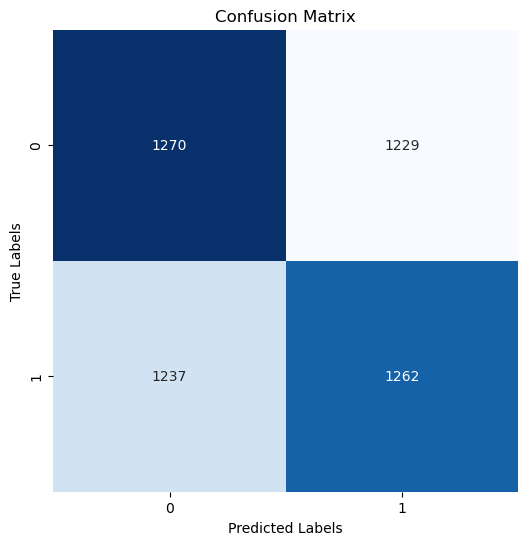

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions on the test data
y_pred = model3.predict(test_generator)
y_pred = np.round(y_pred).flatten()

# Get the true labels from the test data
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


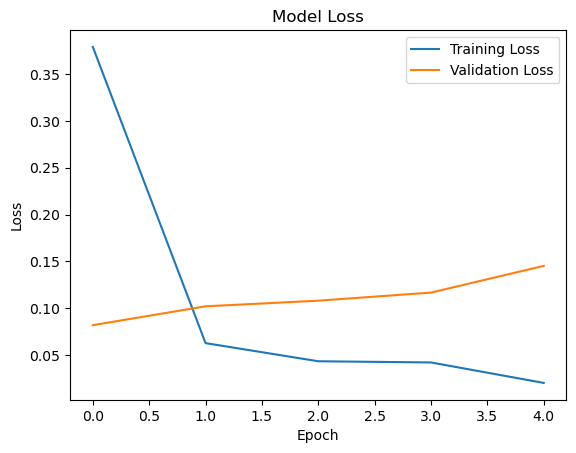

In [45]:
# Plot the training and validation loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

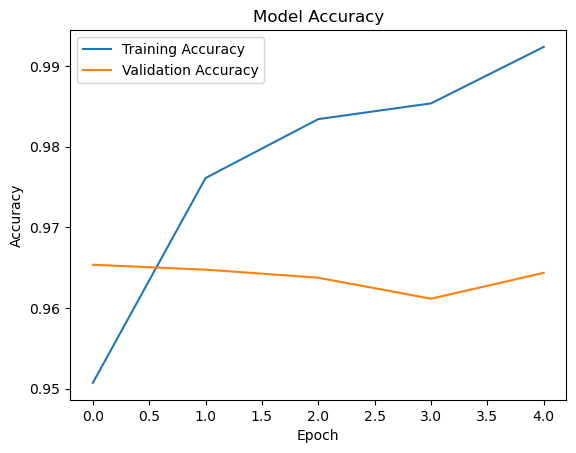

In [46]:
# Plot the training and validation accuracy
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

### Model-4 (InceptionV3)

In [65]:
# # Set the path to the dataset folder
data_dir = 'C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\Converted\\CatsDogs\\Converted'

# # Perform train-test split
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    # color_mode='grayscale',  # Convert images to grayscale
    seed=42
)

test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    # color_mode='grayscale',  # Convert images to grayscale
    seed=42
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [66]:
# Define the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_106 (Conv2D)            (None, 74, 74, 32)   864         ['input_7[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_106[0][0]']             
 ormalization)                                                                                    
                                                                                            

In [67]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/5
625/625 [==============================] - 589s 924ms/step - loss: 0.1186 - accuracy: 0.9535 - val_loss: 0.0975 - val_accuracy: 0.9613
Epoch 2/5
625/625 [==============================] - 571s 914ms/step - loss: 0.0721 - accuracy: 0.9715 - val_loss: 0.0989 - val_accuracy: 0.9615
Epoch 3/5
625/625 [==============================] - 578s 925ms/step - loss: 0.0545 - accuracy: 0.9784 - val_loss: 0.1022 - val_accuracy: 0.9619
Epoch 4/5
625/625 [==============================] - 586s 937ms/step - loss: 0.0433 - accuracy: 0.9840 - val_loss: 0.1024 - val_accuracy: 0.9643
Epoch 5/5
625/625 [==============================] - 595s 952ms/step - loss: 0.0318 - accuracy: 0.9886 - val_loss: 0.1057 - val_accuracy: 0.9651


In [68]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

157/157 [==============================] - 118s 748ms/step - loss: 0.1056 - accuracy: 0.9652
Test loss: 0.10555149614810944
Test accuracy: 0.9651860594749451


In [70]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions on the test data
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()

# Get the true labels from the test data
y_true = test_generator.classes

# Compute classification metrics
report = classification_report(y_true, y_pred, target_names=['cat', 'dog'])
print(report)

157/157 [==============================] - 107s 678ms/step
              precision    recall  f1-score   support

         cat       0.52      0.52      0.52      2499
         dog       0.52      0.51      0.52      2499

    accuracy                           0.52      4998
   macro avg       0.52      0.52      0.52      4998
weighted avg       0.52      0.52      0.52      4998



157/157 [==============================] - 123s 755ms/step


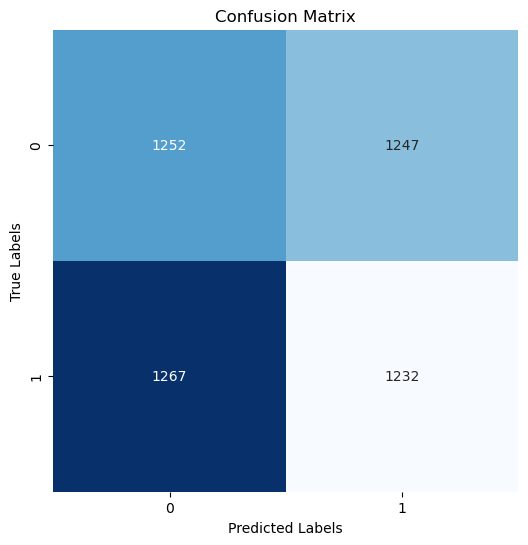

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions on the test data
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()

# Get the true labels from the test data
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

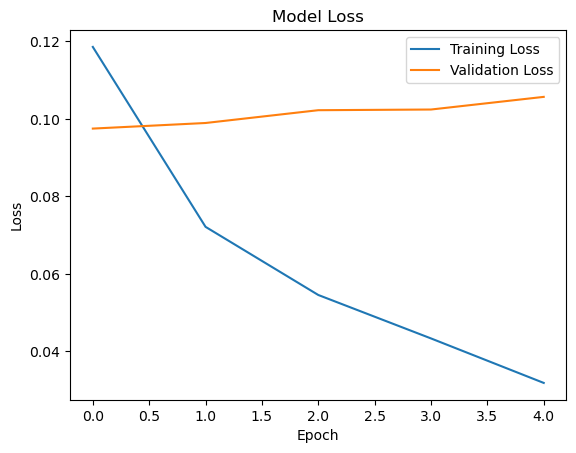

In [71]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

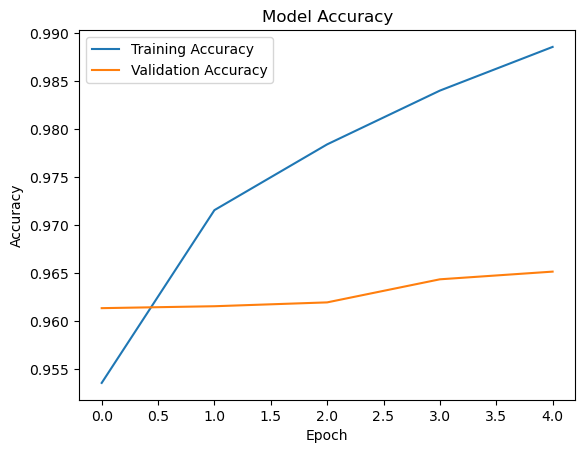

In [72]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [ ]:
## Model Comparison

In [80]:
pd.DataFrame({"Models":["Sequential Model","ResNet50","MobileNetV2","InceptionV3"],
              "Train Accuracy":[0.9827,0.7176,0.9923,0.9886],
              "Validation Accuracy":[0.8776,0.6909,0.9643,0.9651],
              "Test Accuracy":[0.8777,0.6912,0.9643,0.9651]})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Sequential Model,0.9827,0.8776,0.8777
1,ResNet50,0.7176,0.6909,0.6912
2,MobileNetV2,0.9923,0.9643,0.9643
3,InceptionV3,0.9886,0.9651,0.9651


Observations:

Model-1 has the highest train accuracy of 0.9827, indicating a good fit to the training data. However, its validation and test accuracies are slightly lower at 0.8776 and 0.8777, respectively.

Model-2 has a train accuracy of 0.7176, which is relatively lower compared to other models. Its validation and test accuracies are also lower at 0.6909 and 0.6912, respectively.

Model-3 has a very high train accuracy of 0.9923, indicating a strong fit to the training data. Its validation and test accuracies are also high at 0.9643 and 0.9643, respectively.

Model-4 has a high train accuracy of 0.9886, similar to Model-3. Its validation and test accuracies are also high at 0.9651 and 0.9651, respectively.

Overall, Model-3 and Model-4 show the highest validation and test accuracies, indicating better generalization performance.  It's important to consider the trade-off between training accuracy and generalization when selecting the best model for deployment. So we would be looking for cross validation with model-7 to generalize the values.

In [ ]:
K-fold cross validation on the best model

In [77]:
# # Set the path to the dataset folder
data_dir = 'C:\\Users\\SaiSpandana\\OneDrive\\Desktop\\ProBuddy\\Converted\\CatsDogs\\Converted'

# # Perform train-test split
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    # color_mode='grayscale',  # Convert images to grayscale
    seed=42
)

test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    # color_mode='grayscale',  # Convert images to grayscale
    seed=42
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [78]:
# Model 7 seems to be the best model so we will be using K-fold cross validation over this model
from sklearn.model_selection import StratifiedKFold
# Get the image data and labels
images = train_generator[0][0]
labels = train_generator[0][1]
num_folds = 5

# Create Stratified K-fold cross-validator
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_losses = []
fold_accuracies = []

# Perform K-fold cross-validation
for fold, (train_indices, val_indices) in enumerate(kfold.split(images, labels)):
    print(f"Fold: {fold+1}")
    train_images, val_images = images[train_indices], images[val_indices]
    train_labels, val_labels = labels[train_indices], labels[val_indices]

    # Define the third model using MobileNetV2 pre-trained classifier
    base_model3 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    x3 = base_model3.output
    x3 = Flatten()(x3)
    x3 = Dense(512, activation='relu')(x3)
    predictions3 = Dense(1, activation='sigmoid')(x3)
    model = Model(inputs=base_model3.input, outputs=predictions3)

    # Freeze the pre-trained layers
    for layer in base_model3.layers:
        layer.trainable = False

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    # Train the model
    history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=10)

    # Evaluate the model on validation data
    val_loss, val_accuracy = model.evaluate(val_images, val_labels)
    fold_losses.append(val_loss)
    fold_accuracies.append(val_accuracy)



Fold: 1
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_8[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][0]'] 

In [79]:
# Calculate the average loss and accuracy across all folds
avg_loss = np.mean(fold_losses)
avg_accuracy = np.mean(fold_accuracies)

print('Average Validation Loss:', avg_loss)
print('Average Validation Accuracy:', avg_accuracy)

Average Validation Loss: 0.5065185189247131
Average Validation Accuracy: 0.8428571343421936


So now from the cross validation, we can even ensure that this mobilenet model has been performing the best and is reproducible and one other good advantage of using mobilenet model is its fewer number of training parameters as compared to other models.